In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from hurst_exp import *
import matplotlib

plt.rcParams.update({
    "font.family": "serif",
})
matplotlib.rcParams["text.usetex"] = True

In [2]:
files = glob.glob("*dat")

In [3]:
files

['blue_noise.dat',
 'logistic_map_r38.dat',
 'pink_noise.dat',
 'white_noise.dat',
 'chua_x.dat',
 'brown_noise.dat']

In [4]:
kind_name = {
    "chua_x.dat": "Chua's Circuit",
    "white_noise.dat": "White Noise",
    "blue_noise.dat": "Blue Noise",
    "pink_noise.dat": "Pink Noise",
    "brown_noise.dat": "Brown Noise",
    'logistic_map_r38.dat': "Logistic Map"
}
color_map = {
    "chua_x.dat": "Purple",
    "white_noise.dat": "Grey",
    "blue_noise.dat": "Blue",
    "pink_noise.dat": "deeppink",
    "brown_noise.dat": "Brown",
    'logistic_map_r38.dat': "Green"
}

In [39]:
S = []
F = []
for file in files:
    df = pd.read_csv(file, sep=" ", header=None)
    df.drop(columns=[2], inplace=True)
    df.columns = ["t", "data"]
    s, f = mfdfa(df.data.values, min_scale=10, max_scale=1000, order=2, test=True)
    S.append(s)
    F.append(f)

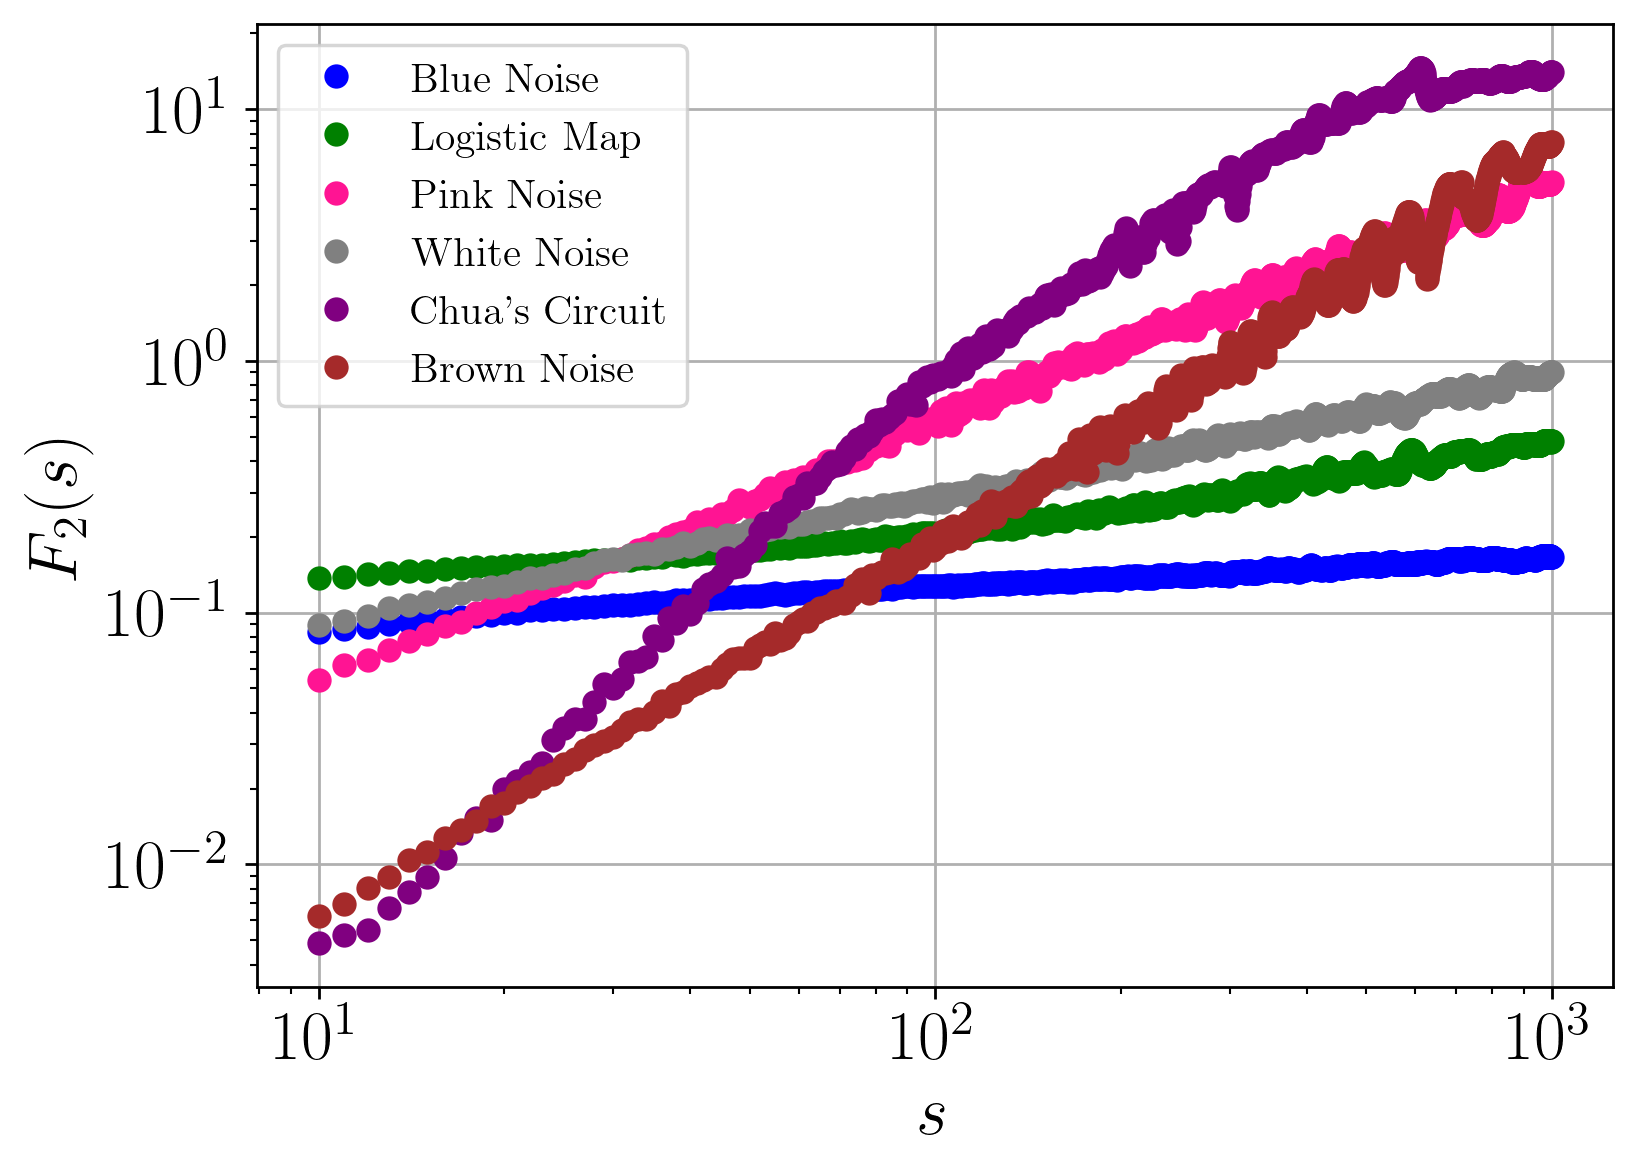

In [47]:
plt.figure(dpi=250, figsize=(7, 5))
for s, f, file in zip(S, F, files):
    plt.plot(s, f, "o", label=kind_name[file], color=color_map[file])

# Y AXES
plt.ylabel("$F_2(s)$", fontsize=20)
plt.yticks(size=20)
plt.yscale("log")

# X AXES
plt.xlabel("$s$", fontsize=20)
plt.xticks(size=20)
plt.xscale("log")

plt.legend(fontsize=12)
plt.grid()
plt.savefig("F_s.png", bbox_inches = "tight")
plt.show()

# FIT PER CASE
## white noise

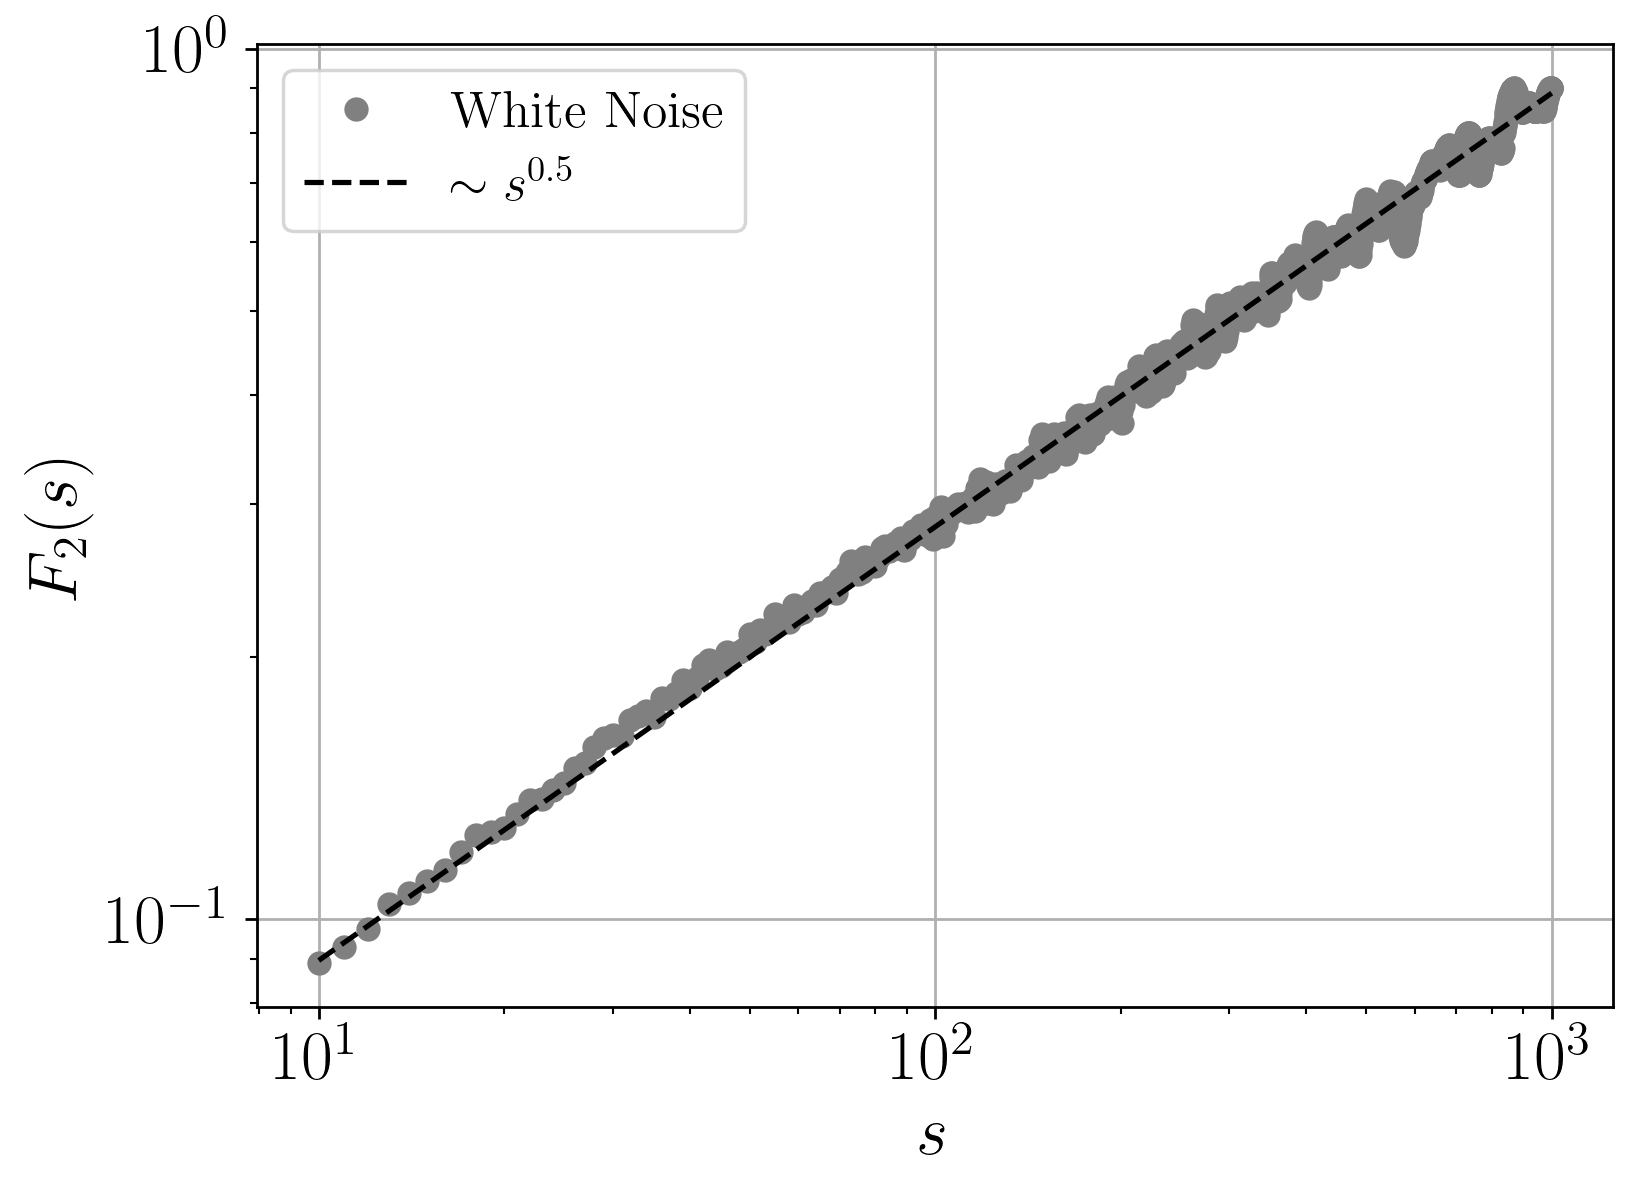

In [11]:
file = "white_noise.dat"
df = pd.read_csv(file, sep=" ", header=None)
df.drop(columns=[2], inplace=True)
df.columns = ["t", "data"]

s, f = mfdfa(df.data.values, min_scale=10, max_scale=1000, order=2, test=True)
x, y, params = XY_fit(s, f)

a = round(params[1],2)
plt.figure(dpi=250, figsize=(7, 5))
plt.plot(s, f, "o", label=kind_name[file], color=color_map[file])
plt.plot(x, y, "k--", label=fr"$\sim s^{{{a}}}$")

# Y AXES
plt.ylabel("$F_2(s)$", fontsize=20)
plt.yticks(size=20)
plt.yscale("log")

# X AXES
plt.xlabel("$s$", fontsize=20)
plt.xticks(size=20)
plt.xscale("log")

plt.legend(fontsize=15)
plt.grid()
plt.savefig(f"{file[:-4]}.png", bbox_inches = "tight")
plt.show()

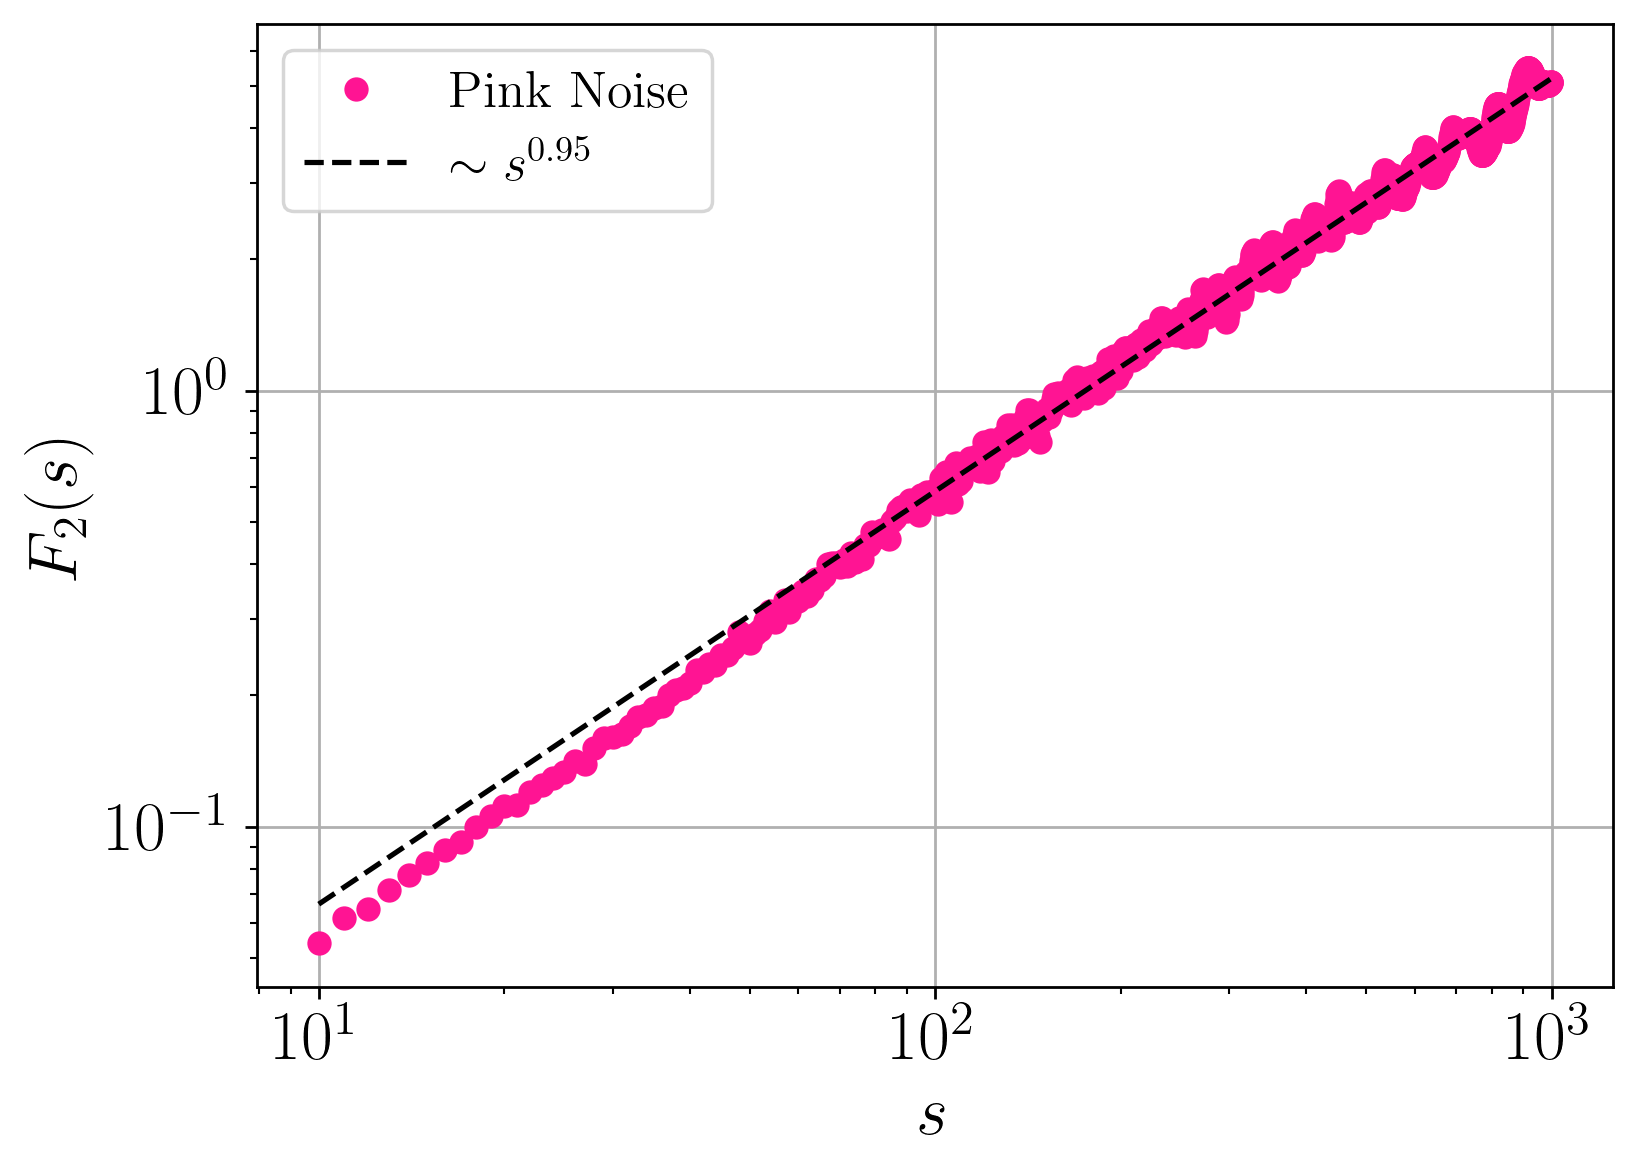

In [12]:
file = "pink_noise.dat"
df = pd.read_csv(file, sep=" ", header=None)
df.drop(columns=[2], inplace=True)
df.columns = ["t", "data"]

s, f = mfdfa(df.data.values, min_scale=10, max_scale=1000, order=2, test=True)
x, y, params = XY_fit(s, f)

a = round(params[1],2)
plt.figure(dpi=250, figsize=(7, 5))
plt.plot(s, f, "o", label=kind_name[file], color=color_map[file])
plt.plot(x, y, "k--", label=fr"$\sim s^{{{a}}}$")

# Y AXES
plt.ylabel("$F_2(s)$", fontsize=20)
plt.yticks(size=20)
plt.yscale("log")

# X AXES
plt.xlabel("$s$", fontsize=20)
plt.xticks(size=20)
plt.xscale("log")

plt.legend(fontsize=15)
plt.grid()
plt.savefig(f"{file[:-4]}.png", bbox_inches = "tight")
plt.show()

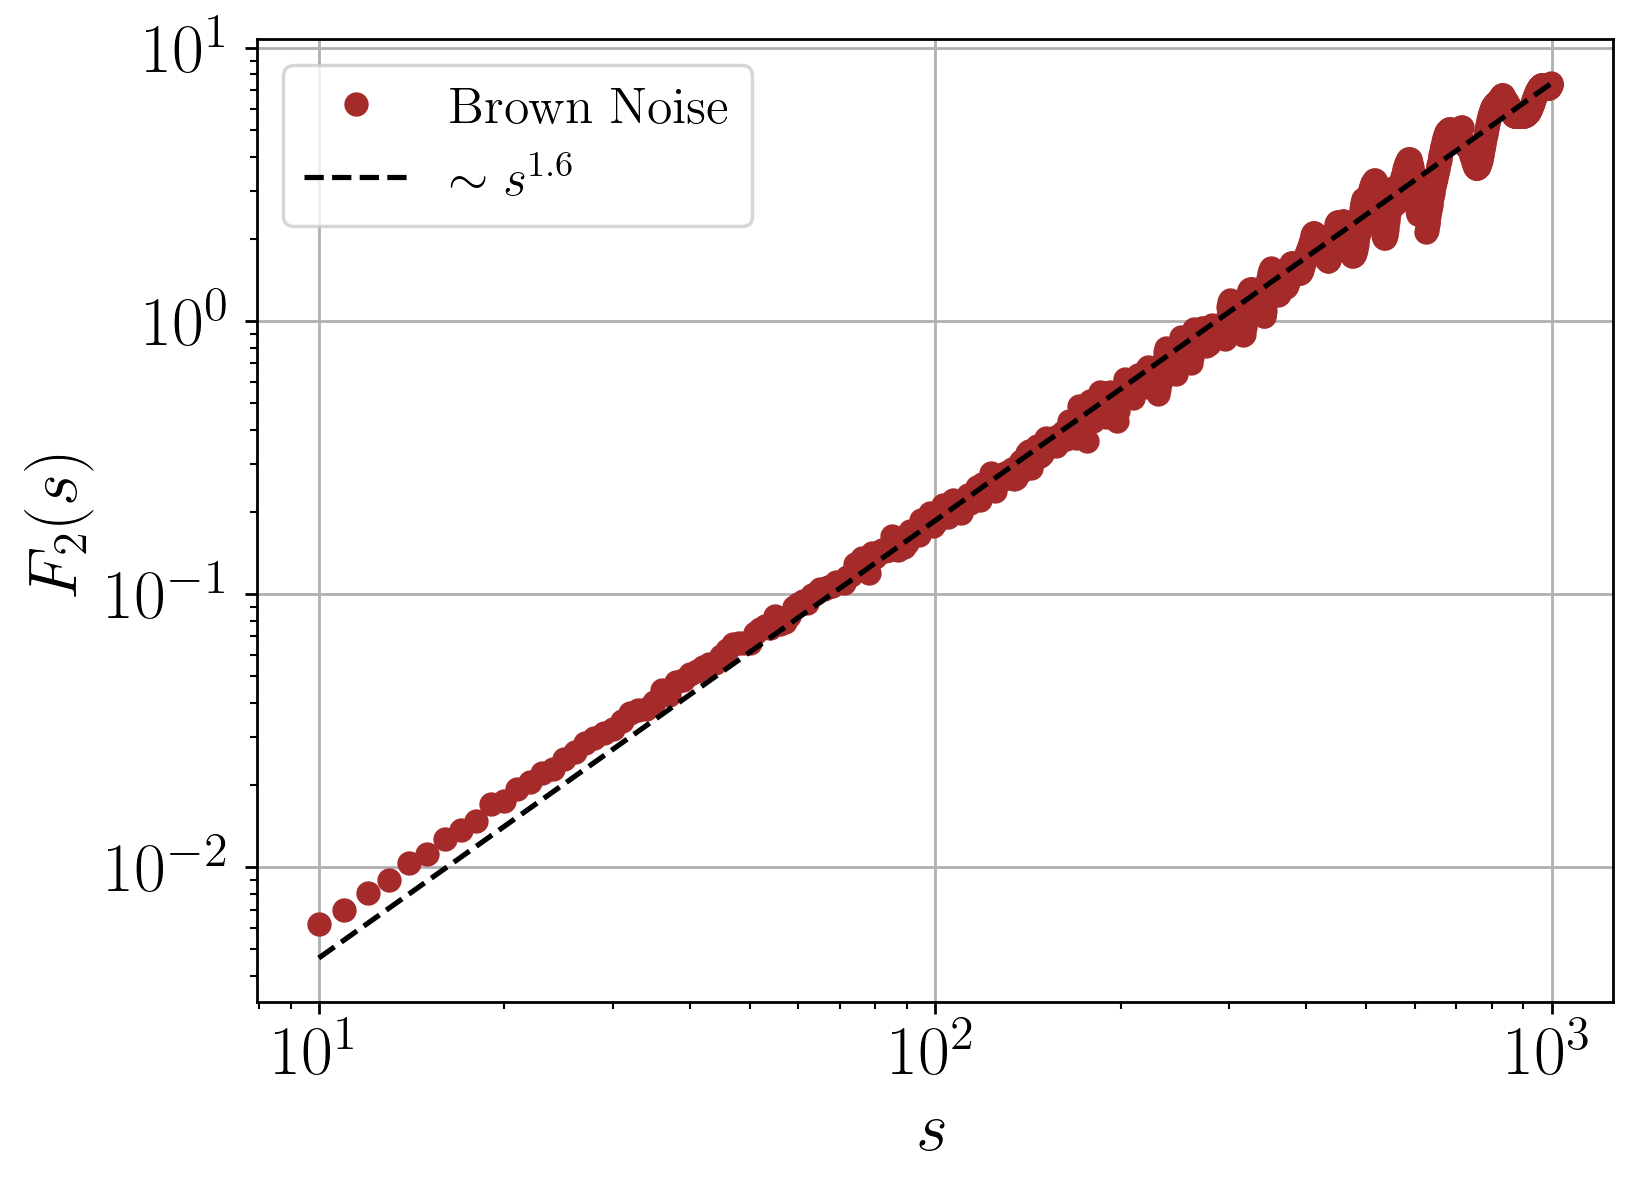

In [15]:
file = "brown_noise.dat"
df = pd.read_csv(file, sep=" ", header=None)
df.drop(columns=[2], inplace=True)
df.columns = ["t", "data"]

s, f = mfdfa(df.data.values, min_scale=10, max_scale=1000, order=2, test=True)
x, y, params = XY_fit(s, f)

a = round(params[1],2)
plt.figure(dpi=250, figsize=(7, 5))
plt.plot(s, f, "o", label=kind_name[file], color=color_map[file])
plt.plot(x, y, "k--", label=fr"$\sim s^{{{a}}}$")

# Y AXES
plt.ylabel("$F_2(s)$", fontsize=20)
plt.yticks(size=20)
plt.yscale("log")

# X AXES
plt.xlabel("$s$", fontsize=20)
plt.xticks(size=20)
plt.xscale("log")

plt.legend(fontsize=15)
plt.grid()
plt.savefig(f"{file[:-4]}.png", bbox_inches = "tight")
plt.show()

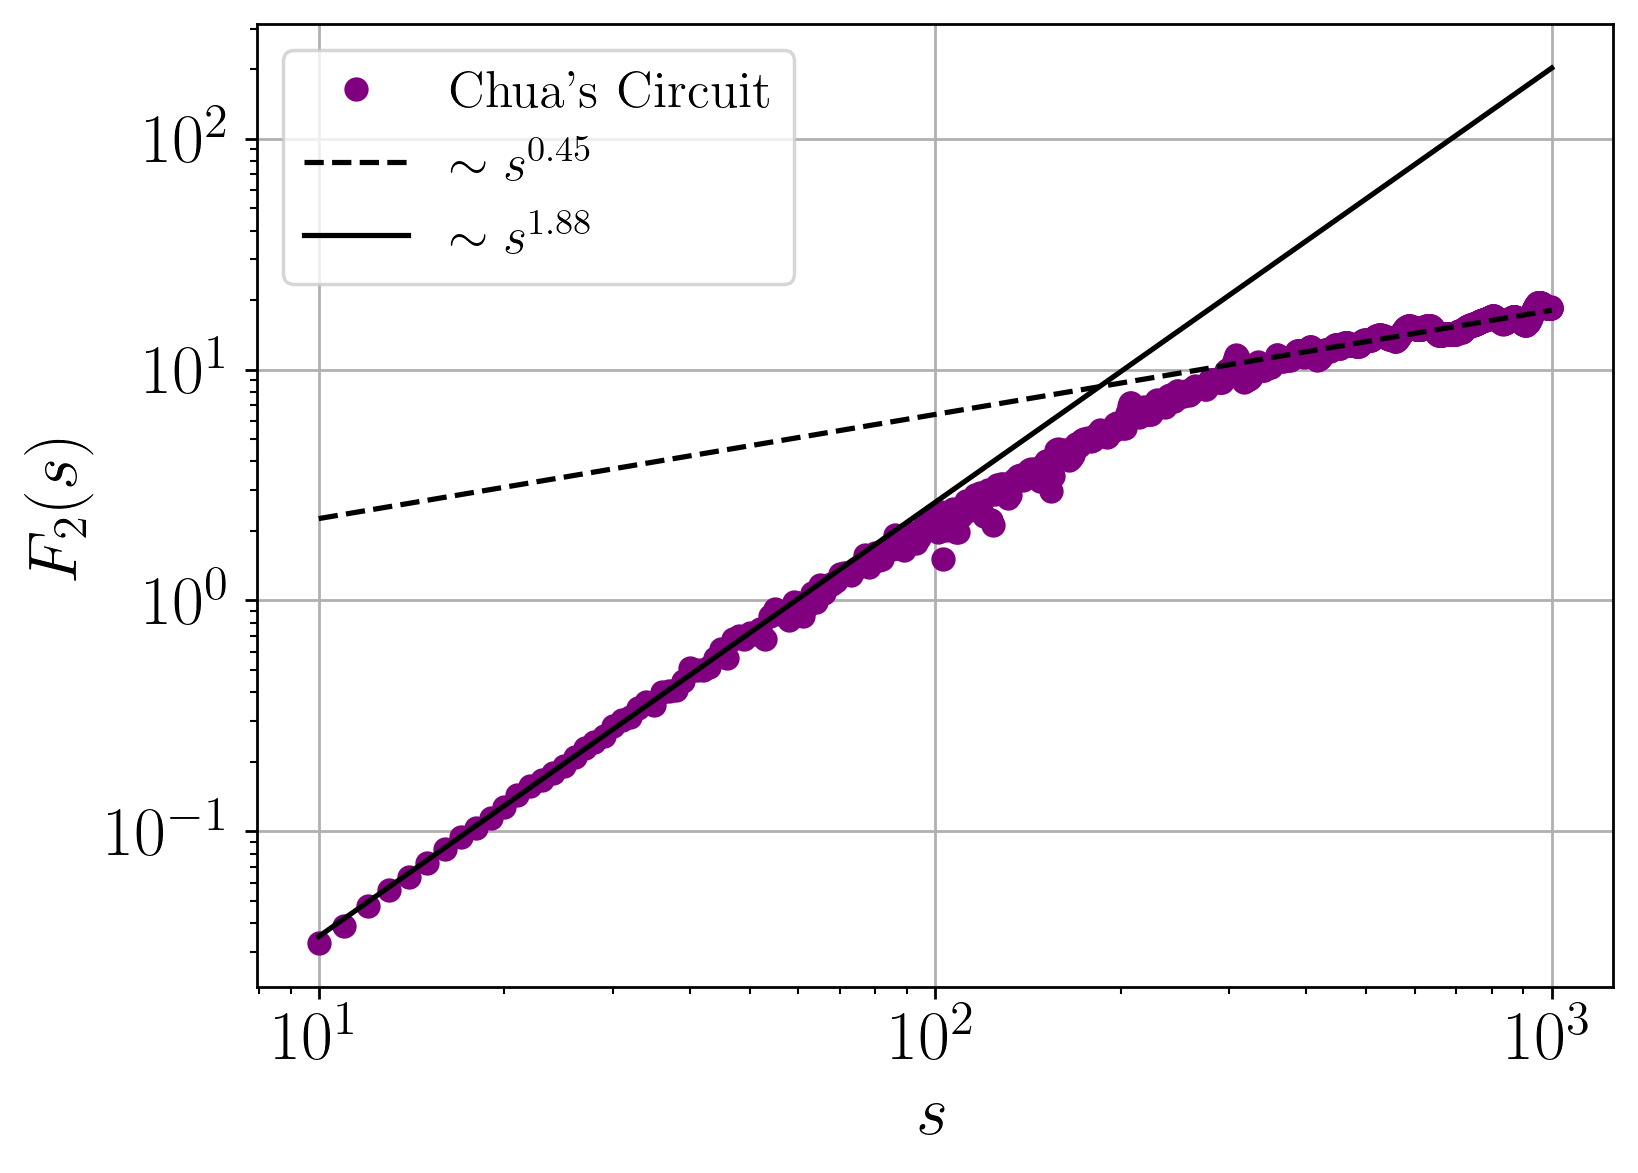

In [30]:
file = "chua_x.dat"
df = pd.read_csv(file, sep=" ", header=None)
df.drop(columns=[2], inplace=True)
df.columns = ["t", "data"]

s, f = mfdfa(df.data.values, min_scale=10, max_scale=1000, order=1, test=True)



plt.figure(dpi=250, figsize=(7, 5))
plt.plot(s, f, "o", label=kind_name[file], color=color_map[file])
x, y, params = XY_fit(s[500:], f[500:])
a = round(params[1],2)
plt.plot(x, y, "k--", label=fr"$\sim s^{{{a}}}$")

x, y, params = XY_fit(s[:-950], f[:-950])
a = round(params[1],2)
plt.plot(x, y, "k-", label=fr"$\sim s^{{{a}}}$")

# Y AXES
plt.ylabel("$F_2(s)$", fontsize=20)
plt.yticks(size=20)
plt.yscale("log")

# X AXES
plt.xlabel("$s$", fontsize=20)
plt.xticks(size=20)
plt.xscale("log")

plt.legend(fontsize=15)
plt.grid()
plt.savefig(f"{file[:-4]}.png", bbox_inches = "tight")
plt.show()

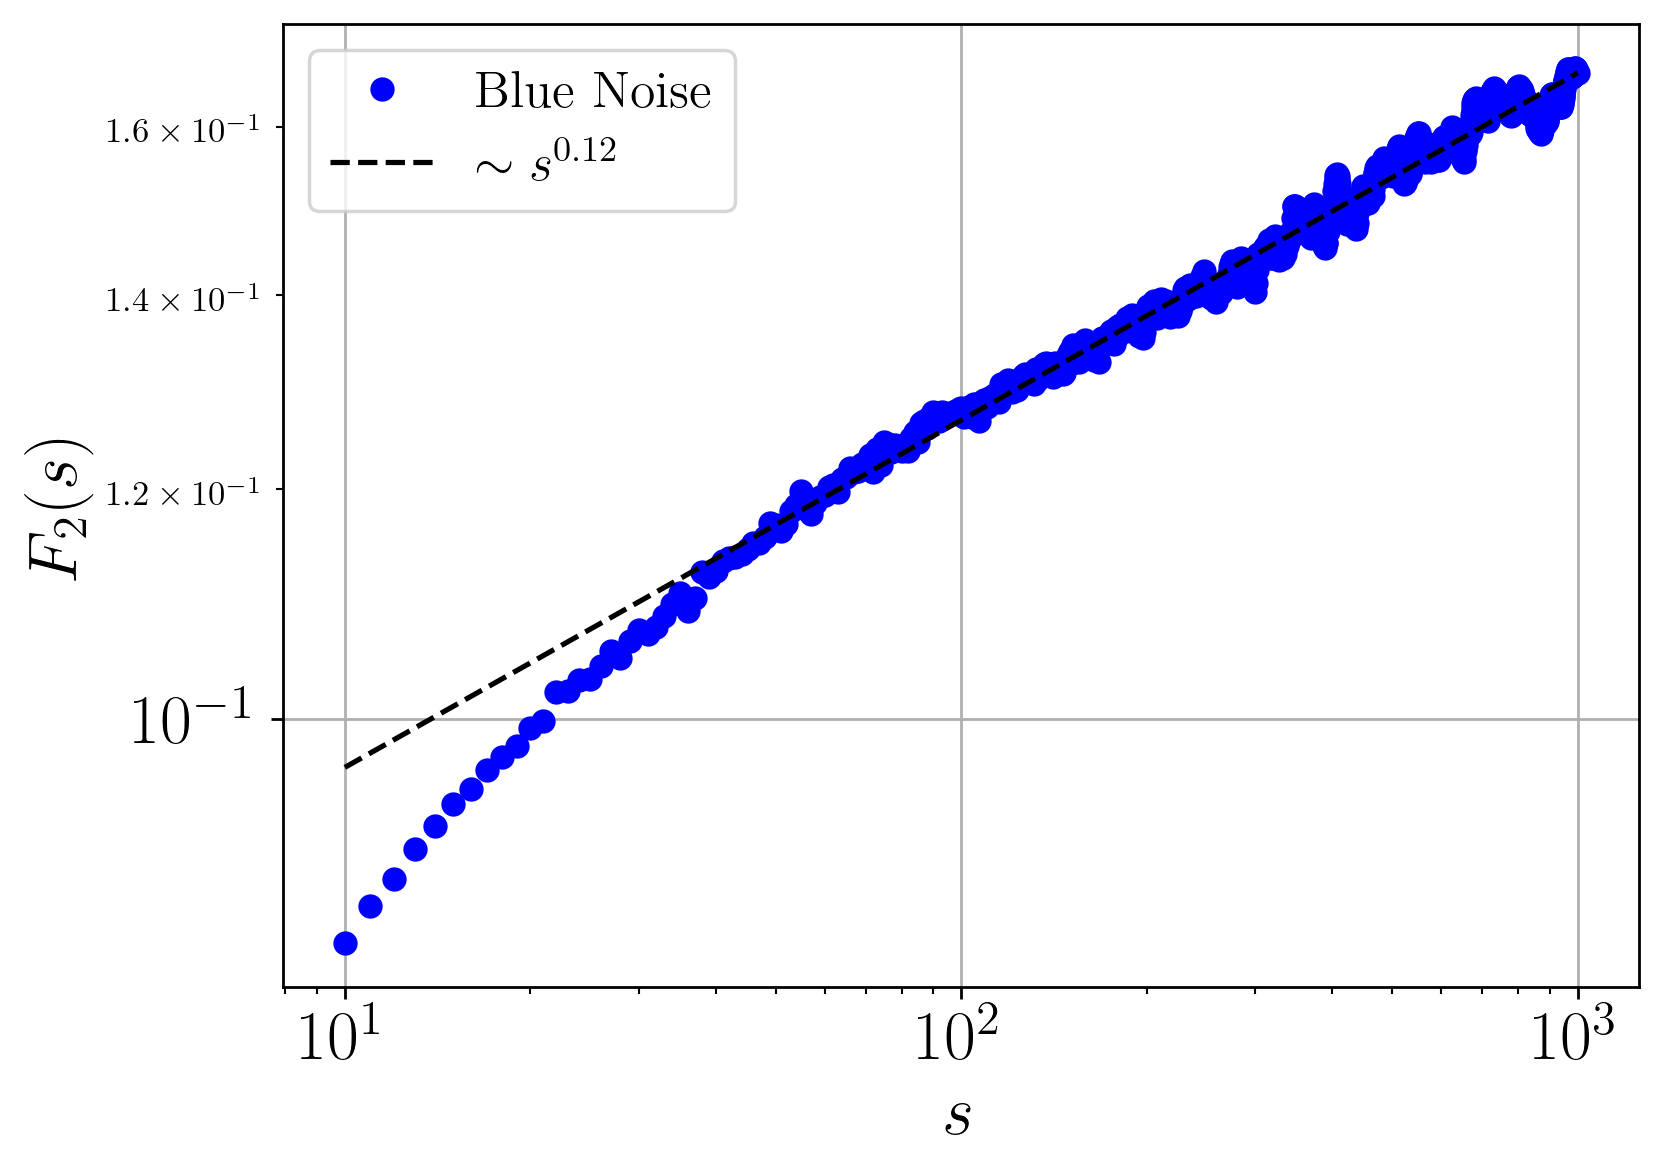

In [32]:
file = "blue_noise.dat"
df = pd.read_csv(file, sep=" ", header=None)
df.drop(columns=[2], inplace=True)
df.columns = ["t", "data"]

s, f = mfdfa(df.data.values, min_scale=10, max_scale=1000, order=2, test=True)
x, y, params = XY_fit(s[100:], f[100:])

a = round(params[1],2)
plt.figure(dpi=250, figsize=(7, 5))
plt.plot(s, f, "o", label=kind_name[file], color=color_map[file])
plt.plot(x, y, "k--", label=fr"$\sim s^{{{a}}}$")

# Y AXES
plt.ylabel("$F_2(s)$", fontsize=20)
plt.yticks(size=20)
plt.yscale("log")

# X AXES
plt.xlabel("$s$", fontsize=20)
plt.xticks(size=20)
plt.xscale("log")

plt.legend(fontsize=15)
plt.grid()
plt.savefig(f"{file[:-4]}.png", bbox_inches = "tight")
plt.show()

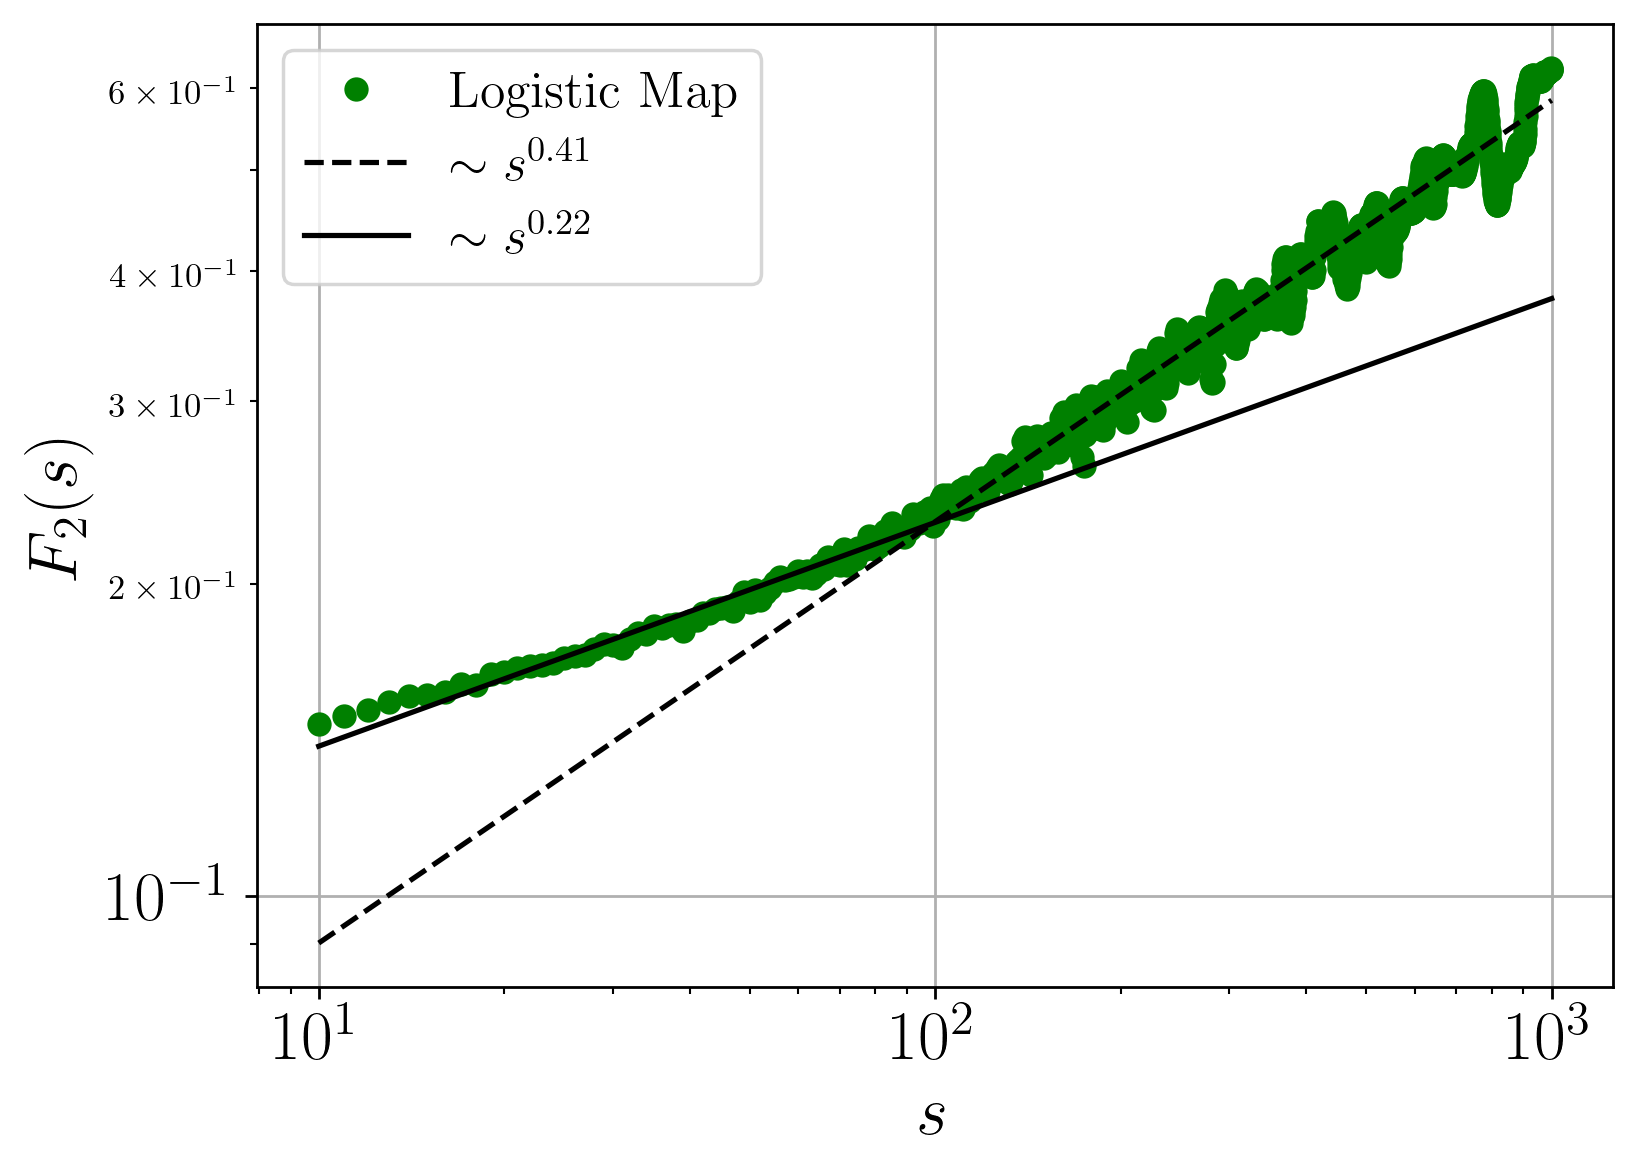

In [36]:
file = "logistic_map_r38.dat"
df = pd.read_csv(file, sep=" ", header=None)
df.drop(columns=[2], inplace=True)
df.columns = ["t", "data"]

s, f = mfdfa(df.data.values, min_scale=10, max_scale=1000, order=1, test=True)



plt.figure(dpi=250, figsize=(7, 5))
plt.plot(s, f, "o", label=kind_name[file], color=color_map[file])
x, y, params = XY_fit(s[20:], f[20:])
a = round(params[1],2)
plt.plot(x, y, "k--", label=fr"$\sim s^{{{a}}}$")

x, y, params = XY_fit(s[:-900], f[:-900])
a = round(params[1],2)
plt.plot(x, y, "k-", label=fr"$\sim s^{{{a}}}$")

# Y AXES
plt.ylabel("$F_2(s)$", fontsize=20)
plt.yticks(size=20)
plt.yscale("log")

# X AXES
plt.xlabel("$s$", fontsize=20)
plt.xticks(size=20)
plt.xscale("log")

plt.legend(fontsize=15)
plt.grid()
plt.savefig(f"{file[:-4]}.png", bbox_inches = "tight")
plt.show()

In [33]:
kind_name

{'chua_x.dat': "Chua's Circuit",
 'white_noise.dat': 'White Noise',
 'blue_noise.dat': 'Blue Noise',
 'pink_noise.dat': 'Pink Noise',
 'brown_noise.dat': 'Brown Noise',
 'logistic_map_r38.dat': 'Logistic Map'}

# ANOMALOUS CASES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from hurst_exp import *
import matplotlib

plt.rcParams.update({
    "font.family": "serif",
})
matplotlib.rcParams["text.usetex"] = True

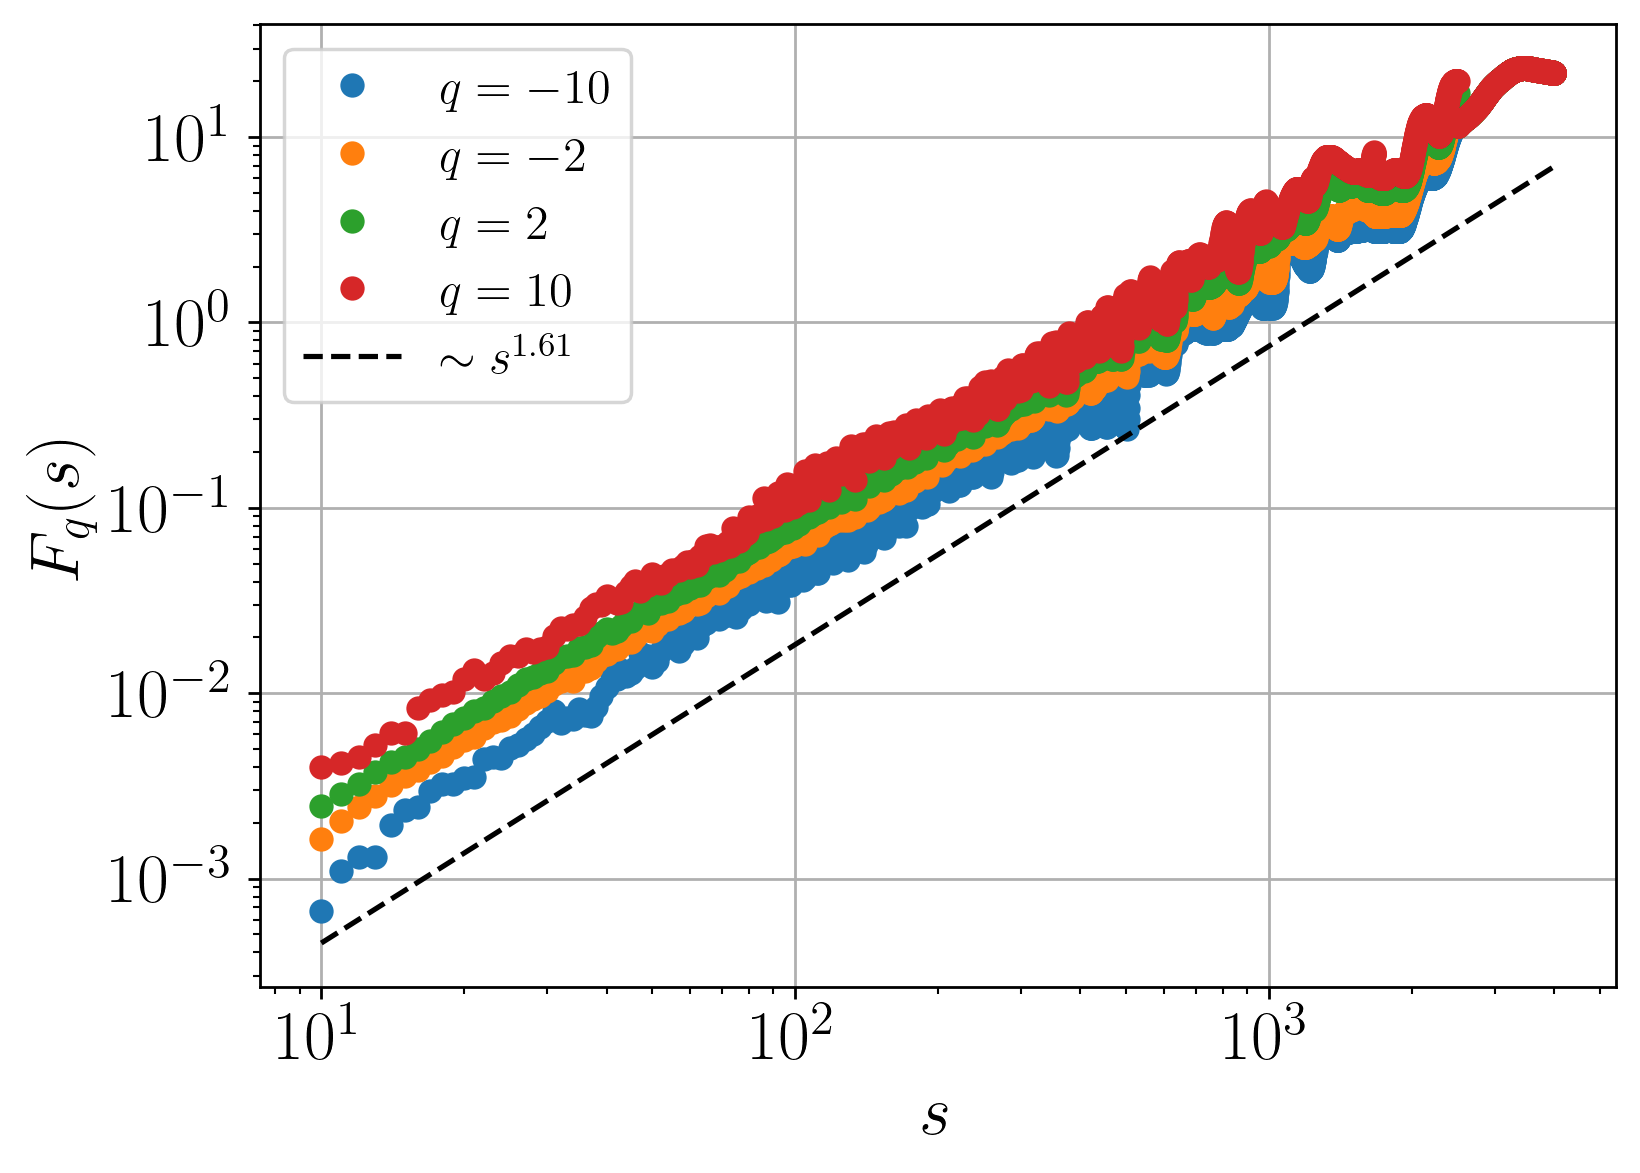

In [16]:
file = "brown_noise.dat"
df = pd.read_csv(file, sep=" ", header=None)
df.drop(columns=[2], inplace=True)
df.columns = ["t", "data"]

Q = [-10, -2, 2, 10]

plt.figure(dpi=250, figsize=(7, 5))

for q in Q:
    s, f = mfdfa(df.data.values, min_scale=10, max_scale=4000, order=4, test=True, q=q)
    plt.plot(s, f, "o", label=rf"$q={{{q}}}$")
    if q == 10:
        #x, y, params = XY_fit(s[50:900], f[50:900], x_range=[10, 4000])
        a = 1.61 #round(params[1],2)
        x = np.linspace(10, 4000, 1000)
        y = pl(x, 1.10265877e-05, a)
        plt.plot(x, y, "k--", label=fr"$\sim s^{{{a}}}$")


# Y AXES
plt.ylabel("$F_q(s)$", fontsize=20)
plt.yticks(size=20)
plt.yscale("log")

# X AXES
plt.xlabel("$s$", fontsize=20)
plt.xticks(size=20)
plt.xscale("log")

plt.legend(fontsize=14)
plt.grid()

plt.savefig(f"Fq_{file[:-4]}.png", bbox_inches = "tight")
plt.show()

In [13]:
params

array([2.10265877e-05, 1.75126034e+00])

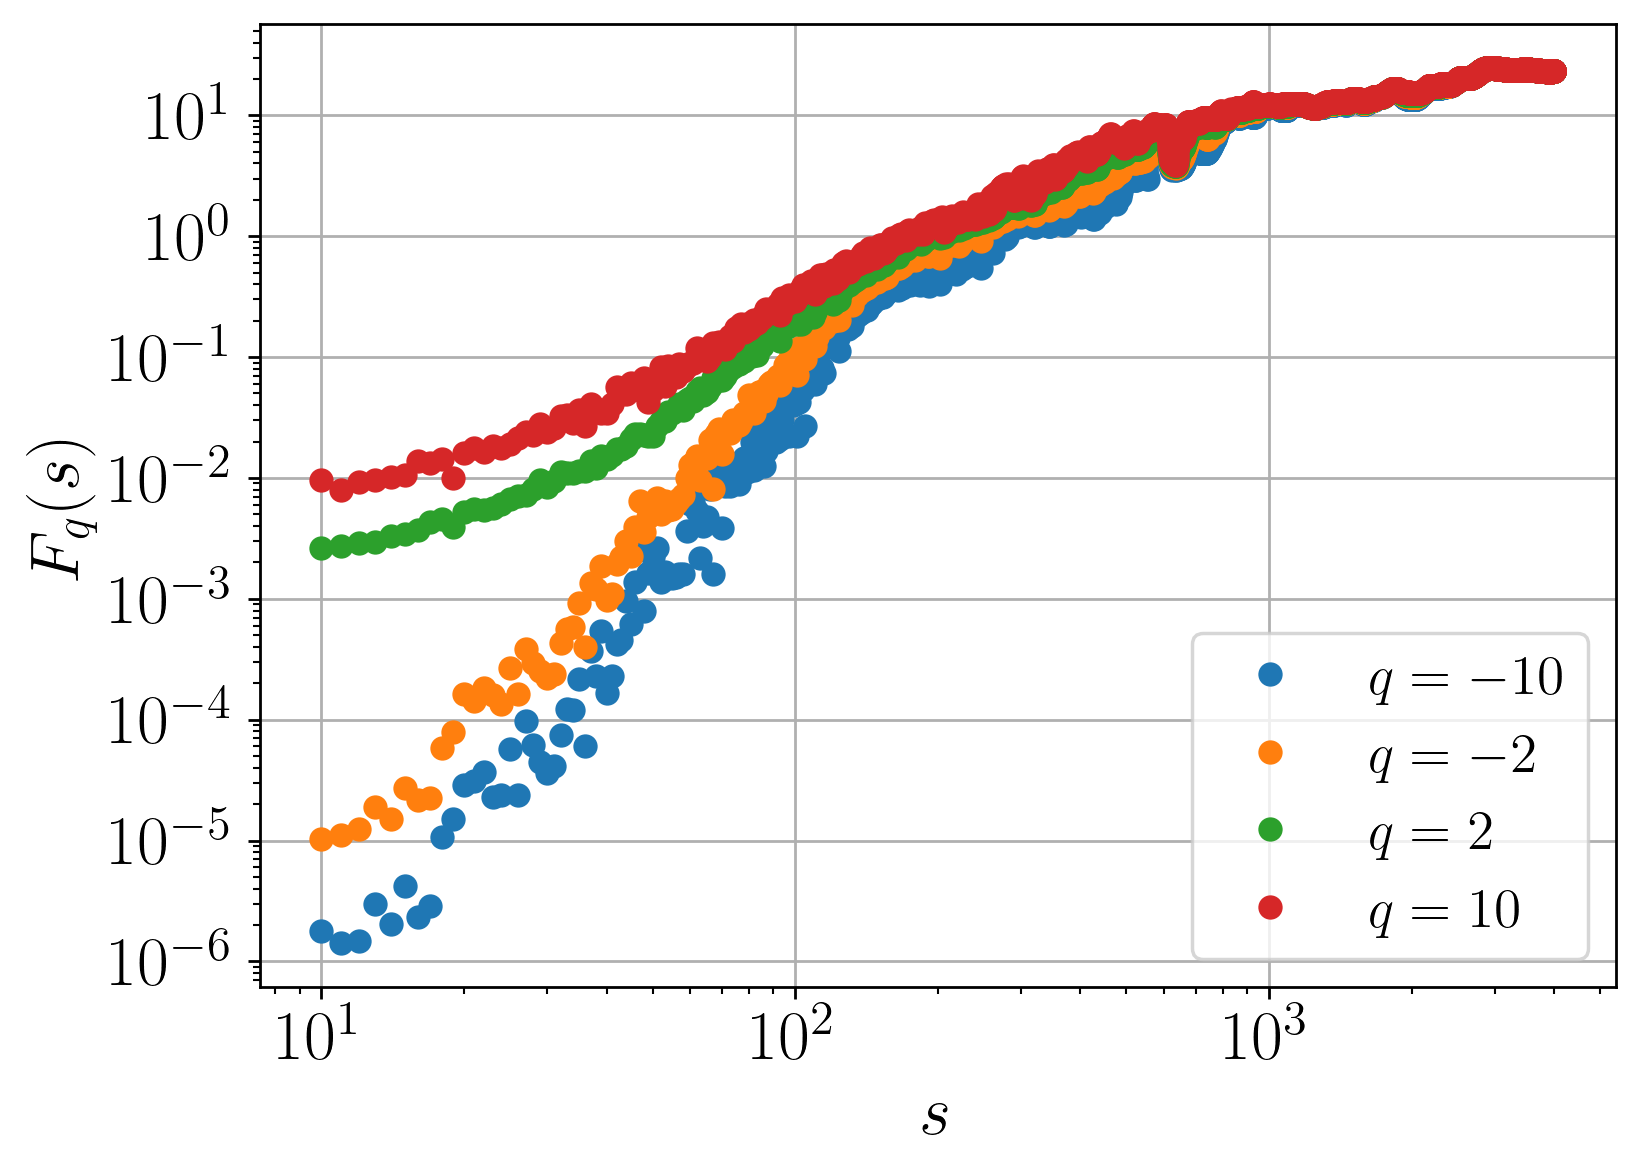

In [17]:
file = "chua_x.dat"
df = pd.read_csv(file, sep=" ", header=None)
df.drop(columns=[2], inplace=True)
df.columns = ["t", "data"]

Q = [-10, -2, 2, 10]

plt.figure(dpi=250, figsize=(7, 5))

for q in Q:
    s, f = mfdfa(df.data.values, min_scale=10, max_scale=4000, order=4, test=True, q=q)
    plt.plot(s, f, "o", label=rf"$q={{{q}}}$")
    if q == -100:
        x = np.linspace(10, 4000, 1000)
        #y = pl(x, 6.92998129e-11, h_bimus(a=b, q=q))
        plt.plot(x, y, "k--")
    elif q == 100:
        x = np.linspace(10, 4000, 1000)
        #y = pl(x, 1.66742663e-04, h_bimus(a=b, q=q))
        plt.plot(x, y, "k--", label=r"$\sim s^{h(q)}$")


# Y AXES
plt.ylabel("$F_q(s)$", fontsize=20)
plt.yticks(size=20)
plt.yscale("log")

# X AXES
plt.xlabel("$s$", fontsize=20)
plt.xticks(size=20)
plt.xscale("log")

plt.legend(fontsize=16, loc="lower right")
plt.grid()

plt.savefig(f"Fq_{file[:-4]}.png", bbox_inches = "tight")
plt.show()